# Comparison of Root Node Selection

In [91]:
from mmot import MMOTSolver

import numpy as np 
import matplotlib.pyplot as plt 

from scipy.ndimage import gaussian_filter
import time

## Simple Translation

In [101]:
# Grid of size n1 x n2
n1 = 1024   # x axis
n2 = 1024   # y axis

x, y = np.meshgrid(np.linspace(0.5/n1,1-0.5/n1,n1), np.linspace(0.5/n2,1-0.5/n1,n2))

r = 0.125

positions = np.array([[0.2,0.8],
                      [0.4,0.6],
                      [0.6,0.4],
                      [0.8,0.2]])

# measures = [None]*len(positions)
measures = [None]*(len(positions))

for i in range(len(positions)):
    xc,yc = positions[i]
    measures[i] = np.zeros((n2, n1))
    measures[i][(x-xc)**2 + (y-yc)**2 < r**2] = 1

    # Normalize
    measures[i] *= n1*n2 / np.sum(measures[i])

    measures[i] = np.flipud(measures[i])

print('Marginal size = ', measures[0].shape)

Marginal size =  (1024, 1024)


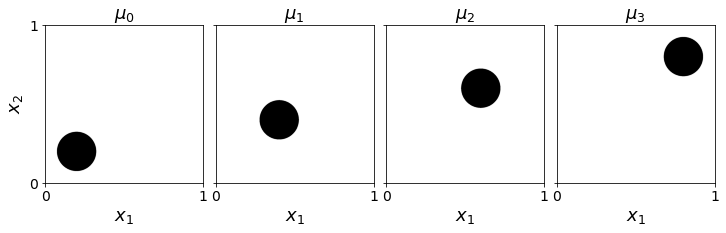

In [102]:

def plot_measures(measures, filename):

    fig, ax = plt.subplots(1, len(measures), figsize=(12,6),sharey=True)
    for i in range(len(measures)):
        ax[i].imshow(measures[i], origin='lower', extent=(0,1,0,1), cmap='Greys')
        ax[i].set_title("$\\mu_{{ {:0d} }}$".format(i),fontsize=18)
        ax[i].set_xlabel('$x_1$',fontsize=18)
        ax[i].set_xticks([0,1])
        ax[i].set_yticks([0,1])

        ax[i].tick_params(axis='x',labelsize=14)
        ax[i].tick_params(axis='y',labelsize=14)

    ax[0].set_ylabel('$x_2$',fontsize=18)
    plt.subplots_adjust(wspace=0.08)

    plt.savefig(filename,bbox_inches='tight')
    plt.show()
    
plot_measures(measures, 'CycleMeasures1.pdf')

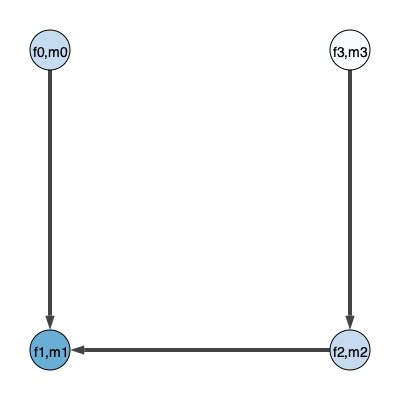

In [103]:
unroll_node = 1

edge_list = [[0,1],
             [1,2],
             [2,3]]


prob = MMOTSolver(measures, edge_list, x, y, unroll_node)

# prob.Visualize('original', filename='CycleCostGraph.svg')
prob.Visualize(unroll_node, filename='CycleCostTree.svg')

In [106]:
root_node_options = [[i] for i in range(len(measures))] + ['all']
results1 = []
for root_nodes in root_node_options:
    start = time.time()
    results1.append( prob.Solve(max_its=500, step_size=1.0, ftol_abs=1e-7, gtol_abs=1e-11, root_nodes=root_nodes) )
    end = time.time()
    print(end-start)

Iteration, StepSize,        Cost,        Error,  Line Its
        0,   1.0000,  8.8136e-03,   7.4827e-04,         0
       10,   0.2670,  1.1017e-01,   4.6443e-02,         0
       20,   0.0134,  1.1468e-01,   4.6797e-02,         4
       30,   0.0161,  1.1661e-01,   1.9595e-02,         0
       40,   0.0386,  1.1786e-01,   3.5466e-03,         0
       50,   0.0927,  1.1847e-01,   1.1211e-03,         0
       60,   0.1113,  1.1892e-01,   8.7565e-04,         0
       70,   0.1338,  1.1916e-01,   4.6309e-04,         0
       80,   0.3214,  1.1934e-01,   5.8766e-04,         0
       90,   0.1931,  1.1944e-01,   3.4830e-04,         0
      100,   0.2319,  1.1955e-01,   2.3914e-04,         0
      110,   0.1393,  1.1961e-01,   1.4559e-04,         0
      120,   0.1674,  1.1968e-01,   1.3195e-04,         0
      130,   0.1005,  1.1972e-01,   9.7285e-05,         0
      140,   0.0604,  1.1976e-01,   7.5455e-05,         0
      150,   0.0363,  1.1979e-01,   6.3900e-05,         0
      160,   0

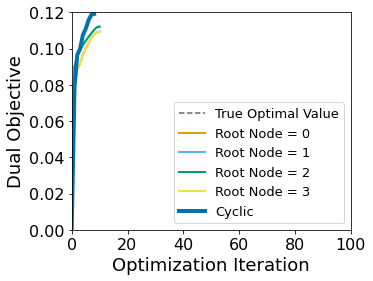

In [78]:
def plot_history(results, xlim, ylim):
    colors = ['#E69F00', '#56B4E9', '#009E73', '#F0E442', '#0072B2', '#D55E00', '#CC79A7'] # colorblind safe, from https://davidmathlogic.com/colorblind


    for i,res in enumerate(results):
        if(root_node_options[i]!='all'):
            plt.plot(res.costs,label='Root Node = {}'.format(root_node_options[i][0]), c=colors[i], linewidth=2)
        else:
            plt.plot(res.costs,label='Cyclic',linewidth=4, c=colors[i])

    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.ylabel('Dual Objective',fontsize=18)
    plt.xlabel('Optimization Iteration',fontsize=18)
    plt.legend(loc='lower right',fontsize=13) 
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

plt.figure(figsize=(5,4))
true_val = 3*(0.2**2 + 0.2**2)
plt.plot([0,300],[true_val,true_val], '--k', alpha=0.6,label='True Optimal Value')

plot_history(results1, [0,100], [0.0,0.12])

plt.savefig('CyclePerformance1.pdf',bbox_inches='tight')
plt.show()

## More Complicated Marginals

In [33]:
def pad(img,pad_size=5):
    temp = np.ones((img.shape[0]+2*pad_size,img.shape[1]+2*pad_size))
    temp[pad_size:-pad_size,pad_size:-pad_size] = img
    return temp


In [40]:
measures = [None]*4
measures[0] = np.flipud(1-pad(plt.imread('images/redcross.png')[:, :, 2]))
measures[1] = np.flipud(1-pad(plt.imread('images/tooth.png')[:, :, 2]))
measures[2] = np.flipud(1-pad(plt.imread('images/heart.png')[:, :, 2]))
measures[3] = np.flipud(1-pad(plt.imread('images/duck.png')[:, :, 2]))

for i in range(len(measures)):
    measures[i] *= np.prod(measures[i].shape)/np.sum(measures[i])
   
print('Marginal size = ', measures[0].shape)

# Grid of size n1 x n2
n1,n2 = measures[0].shape

x, y = np.meshgrid(np.linspace(0.5/n1,1-0.5/n1,n1), np.linspace(0.5/n2,1-0.5/n1,n2))

Marginal size =  (138, 138)


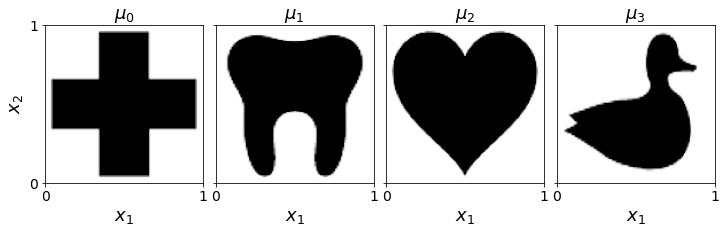

In [41]:
plot_measures(measures, 'CycleMeasures2.pdf')

In [42]:
prob = MMOTSolver(measures, edge_list, x, y, unroll_node)


results2 = []
for root_nodes in root_node_options:
    results2.append( prob.Solve(max_its=500, step_size=1.0, ftol_abs=1e-12, gtol_abs=1e-8, root_nodes=root_nodes) )

Iteration, StepSize,        Cost,        Error,  Line Its
        0,   0.1250,  6.5669e-03,   1.3576e-01,         3
       10,   0.5625,  3.0531e-02,   4.5176e-04,         0
       20,   0.7119,  3.0801e-02,   4.4889e-05,         0
       30,   0.4746,  3.0843e-02,   1.9367e-05,         0
       34,   0.0000,  3.0844e-02,   1.7200e-05,        20
Terminating due to failed line search.
Iteration, StepSize,        Cost,        Error,  Line Its
        0,   0.2500,  4.9347e-03,   1.6786e-01,         2
       10,   0.2109,  3.0674e-02,   2.6575e-04,         0
       20,   0.2109,  3.0845e-02,   4.3533e-05,         0
       29,   0.0000,  3.0858e-02,   1.6165e-05,        20
Terminating due to failed line search.
Iteration, StepSize,        Cost,        Error,  Line Its
        0,   1.0000,  1.3913e-02,   7.9672e-02,         0
       10,   0.2109,  3.0740e-02,   1.2528e-04,         0
       20,   0.2109,  3.0855e-02,   3.0561e-05,         0
       26,   0.0000,  3.0859e-02,   2.3924e-05,     

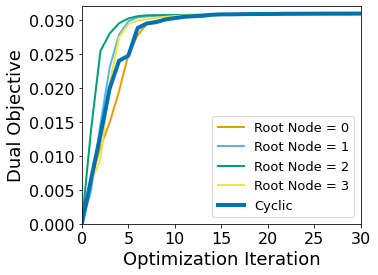

In [45]:
plt.figure(figsize=(5,4))

plot_history(results2, [0,30], [0.0,0.032])

plt.savefig('CyclePerformance2.pdf',bbox_inches='tight')
plt.show()

## Complicated Marginals with Translation

In [34]:
n1, n2 = 512,512
measures = [np.zeros]*4
measures[0] = np.zeros((n1,n2))
measures[0][30:168,30:168] = np.flipud(1-pad(plt.imread('images/redcross.png')[:, :, 2]))

measures[1] = np.zeros((n1,n2))
measures[1][130:268,130:268] = np.flipud(1-pad(plt.imread('images/tooth.png')[:, :, 2]))

measures[2] = np.zeros((n1,n2))
measures[2][230:368,230:368] = np.flipud(1-pad(plt.imread('images/heart.png')[:, :, 2]))

measures[3] = np.zeros((n1,n2))
measures[3][330:468,330:468] = np.flipud(1-pad(plt.imread('images/duck.png')[:, :, 2]))

for i in range(len(measures)):
    measures[i] *= np.prod(measures[i].shape)/np.sum(measures[i])
   
print('Marginal size = ', measures[0].shape)

# Grid of size n1 x n2
n1,n2 = measures[0].shape

x, y = np.meshgrid(np.linspace(0.5/n1,1-0.5/n1,n1), np.linspace(0.5/n2,1-0.5/n1,n2))

Marginal size =  (512, 512)


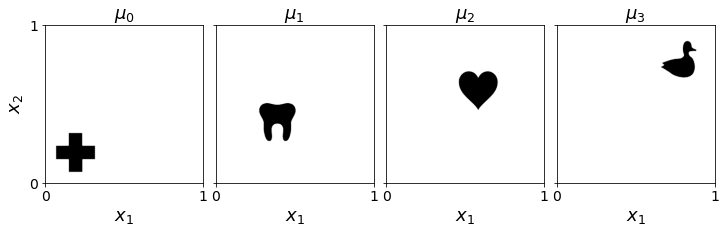

In [35]:
plot_measures(measures,'CycleMeasures3.pdf')

In [36]:
prob = MMOTSolver(measures, edge_list, x, y, unroll_node)


results3 = []
for root_nodes in root_node_options:
    results3.append( prob.Solve(max_its=500, step_size=1.0, ftol_abs=1e-12, gtol_abs=1e-8, root_nodes=root_nodes) )

Iteration, StepSize,        Cost,        Error,  Line Its
        0,   0.2500,  6.9815e-02,   9.0088e-01,         2
       10,   0.0250,  1.0105e-01,   4.8758e-02,         0
       20,   0.0601,  1.0725e-01,   1.1558e-02,         0
       30,   0.1445,  1.0975e-01,   6.5572e-03,         0
       40,   0.0145,  1.1121e-01,   1.0466e-02,         0
       50,   0.0348,  1.1201e-01,   2.3142e-03,         0
       60,   0.0418,  1.1255e-01,   1.5430e-03,         0
       70,   0.1003,  1.1300e-01,   9.7541e-04,         0
       80,   0.0603,  1.1330e-01,   8.7044e-04,         0
       90,   0.1448,  1.1358e-01,   6.6737e-04,         0
      100,   0.0870,  1.1375e-01,   5.0185e-04,         0
      110,   0.0522,  1.1389e-01,   4.3254e-04,         0
      120,   0.0314,  1.1400e-01,   3.9625e-04,         0
      130,   0.0377,  1.1411e-01,   2.7120e-04,         0
      140,   0.0906,  1.1419e-01,   1.7729e-04,         0
      150,   0.0544,  1.1425e-01,   1.5110e-04,         0
      160,   0

       20,   0.0067,  1.1450e-01,   4.4615e-04,         0
       30,   0.0080,  1.1454e-01,   2.8624e-04,         0
       40,   0.0386,  1.1455e-01,   6.6000e-05,         0
       50,   0.0154,  1.1455e-01,   4.8758e-05,         2
       60,   0.0165,  1.1455e-01,   1.8572e-05,         0
       70,   0.0029,  1.1455e-01,   2.9947e-05,         2
       80,   0.0021,  1.1455e-01,   1.6540e-05,         0
       90,   0.0002,  1.1455e-01,   3.0047e-05,         1
      100,   0.0001,  1.1455e-01,   1.6386e-05,         0
      110,   0.0000,  1.1455e-01,   3.0059e-05,         1
      120,   0.0000,  1.1455e-01,   1.6377e-05,         0
      130,   0.0000,  1.1455e-01,   3.0059e-05,         1
      134,   0.0000,  1.1455e-01,   3.0059e-05,         1
Terminating due to small change in objective.


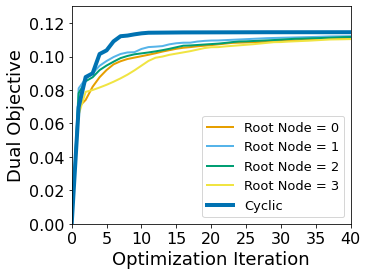

In [46]:
plt.figure(figsize=(5,4))

plot_history(results3, [0,40], [0,0.13])

plt.savefig('CyclePerformance3.pdf',bbox_inches='tight')
plt.show()